In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'mvtec_loco'
run= "contamination_0"  
experiment=  "Exp_17_02_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


In [3]:
# load clean
exp_name= "Exp_25_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)




# load contam
exp_name= "Exp_20_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)


res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['contaminated']*len(res_df_cont)


print(res_df_cont.head())

res_df_end=pd.concat([res_df, res_df_cont])
res_df_end.tail()

['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']
breakfast_box
juice_bottle
pushpins
screw_bag
splicing_connectors
['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']
       Loss  Loss_scale  image_AUC  pixel_AUC       category contamination  \
0  0.006019    0.010973   0.690108   0.533298  breakfast_box            10   
1  0.006049    0.011020   0.734852   0.476840  breakfast_box            10   
2  0.006051    0.011104   0.743624   0.486321  breakfast_box            10   
3  0.006071    0.011129   0.681852   0.526749  breakfast_box            10   
4  0.006053    0.011049   0.623618   0.494306  breakfast_box            10   

        setting  
0  contaminated  
1  contaminated  
2  contaminated  
3  contaminated  
4  contaminated  


,Loss,Loss_scale,image_AUC,pixel_AUC,category,contamination,setting
0,0.005278,0.012007,0.859741,0.733470,splicing_connectors,10,contaminated
1,0.005261,0.011941,0.855097,0.763372,splicing_connectors,10,contaminated
2,0.005250,0.011779,0.853992,0.749947,splicing_connectors,10,contaminated
3,0.005268,0.011880,0.836466,0.725902,splicing_connectors,10,contaminated
4,0.005282,0.011964,0.864054,0.744793,splicing_connectors,10,contaminated


       Loss  Loss_scale  image_AUC  pixel_AUC       category contamination  \
0  0.006350    0.011551   0.712456   0.520209  breakfast_box             0   
1  0.006380    0.011557   0.664853   0.520083  breakfast_box             0   
2  0.006377    0.011505   0.711493   0.513729  breakfast_box             0   
3  0.006433    0.011641   0.738638   0.491805  breakfast_box             0   
4  0.006349    0.011594   0.727304   0.487719  breakfast_box             0   

  setting  
0   clean  
1   clean  
2   clean  
3   clean  
4   clean  
['breakfast_box', 'juice_bottle', 'pushpins', 'screw_bag', 'splicing_connectors']


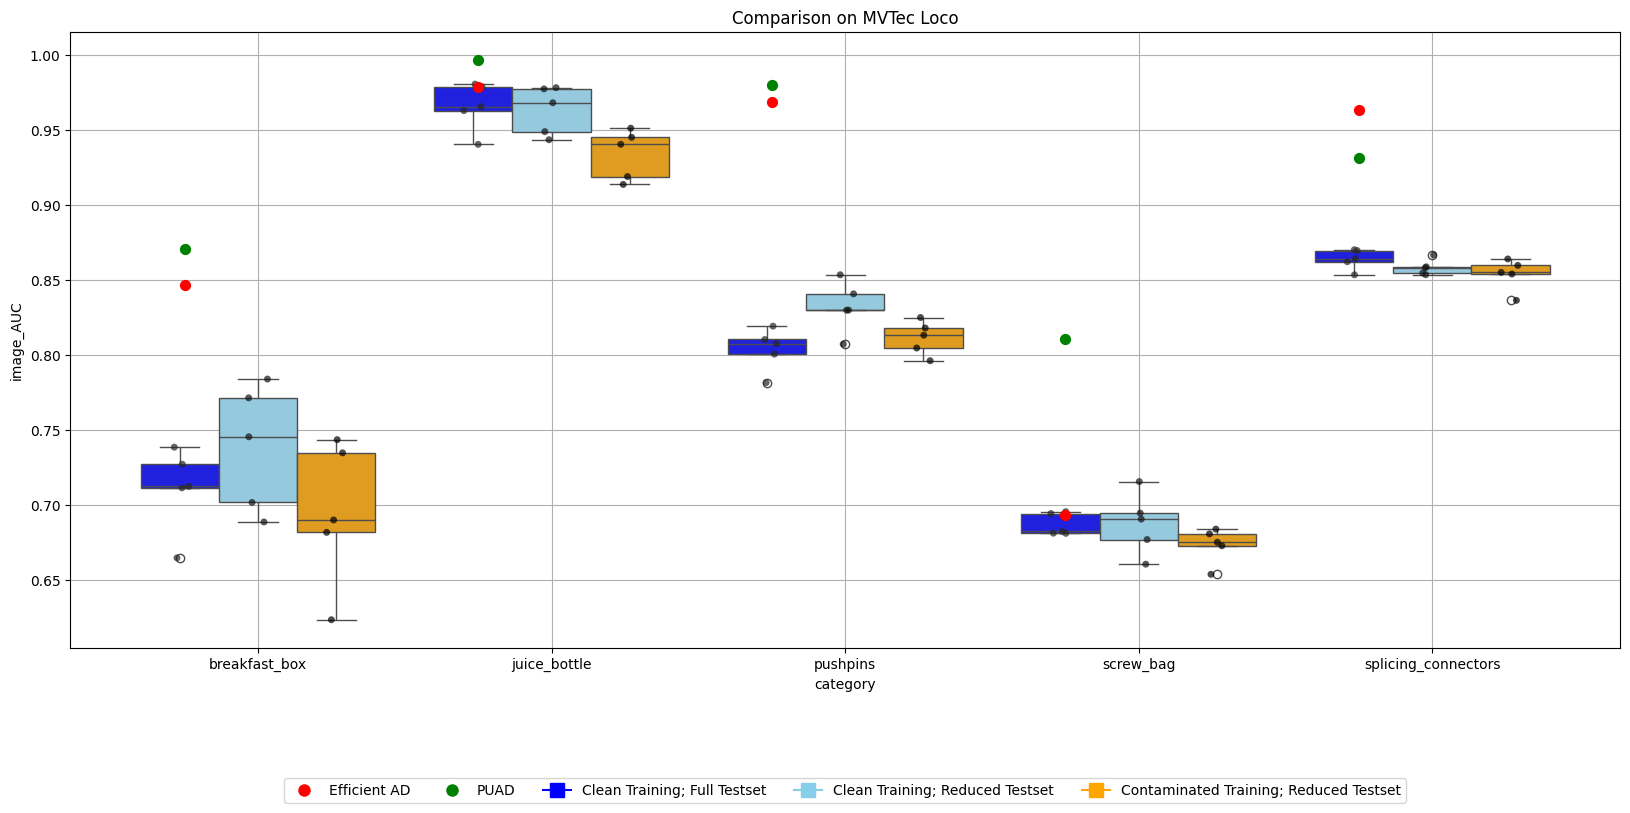

In [4]:


print(res_df_end.head())


################################### load prevoius resulkts before loss

# plt.figure(figsize=(15, 8))
# res_df_end = pd.read_pickle('/home/bule/projects/UTRAD/results/mvtec_loco/allresults/contaminated_vs_clean_box.pkl')





auc_EfficicentAD = {'breakfast_box': [0.8464],'juice_bottle': [0.9789],'pushpins': [0.9684],'screw_bag': [0.6936],'splicing_connectors':[0.9633]}
auc_PUAD = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}



# ad cleaned
exp_name= "Exp_20_06_24"
category= "breakfast_box"
root= '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/'

with open('/home/bule/projects/UTRAD/configurations/mvtec_loco.json', 'r') as file:
    conf_loco = json.load(file)
print(list(conf_loco['anomaly_categories'].keys()))



category_list= list(conf_loco['anomaly_categories'].keys())
#category_list= ['breakfast_box', 'screw_bag']
run_range= np.arange(1,6)

res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)


res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['clean_reduced']*len(res_df_cont)


res_df_end=pd.concat([res_df_end, res_df_cont])

hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}

plt.figure(figsize=(20, 8))


ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


# for category, auc in auc_EfficicentAD.items():
#     ax.scatter(x=[category], y=auc, color='red', s=75, zorder=5)
# for category, auc in auc_PUAD.items():
#     ax.scatter(x=[category], y=auc, color='green', s=75, zorder=5)



for category, auc in auc_EfficicentAD.items():
    x_position = list(res_df_end['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

for category, auc in auc_PUAD.items():
    x_position = list(res_df_end['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='green', s=50, marker='o', zorder=4, linewidths=1)








legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Efficient AD', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='PUAD', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)

In [5]:
def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', log)
            if os.path.exists(logfile_path):
                if len(read_training_scores(logfile_path)['Loss'] )==150:
                    logfile_paths.append(logfile_path)  
                    logfile_path_names.extend([logfile_path]*150)
                    runs.extend([run]*150) 
        
        allrows_df=all_results_conc(logfile_paths)
        allrows_df['path']=logfile_path_names        
        allrows_df['run']=runs
        allrows_df['category']= [category]*len(allrows_df)
        allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
        allrows_df['contamination']= [contamination]*len(allrows_df)
        allrows_df['setting']= [setting]*len(allrows_df)
        res_df.append(allrows_df)
    return  pd.concat(res_df)

allrows_df_end_cont=         read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args.log',exp_name= "Exp_20_06_24",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')
allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args_cleaned.log',exp_name= "Exp_20_06_24",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')
allrows_df_end_clean=        read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec_loco/',log='args.log',exp_name= "Exp_25_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec_loco.json')

allres=pd.concat([allrows_df_end_cont,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

,Loss,Loss_scale,image_AUC,pixel_AUC,epoch,path,run,category,postprocessing,contamination,setting
0,0.083441,34.873009,0.475748,0.543025,0,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
1,0.063348,21.652822,0.511426,0.314232,1,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
2,0.058088,15.409805,0.505160,0.325451,2,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
3,0.054160,10.085503,0.472063,0.160414,3,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
4,0.049071,5.540676,0.577694,0.140485,4,/home/bule/projects/UTRAD/results/mvtec_loco/c...,1,breakfast_box,original,10,contaminated
...,...,...,...,...,...,...,...,...,...,...,...
745,0.005636,0.012729,0.865111,0.755608,145,/home/bule/projects/UTRAD/results/mvtec_loco/c...,5,splicing_connectors,original,0,clean
746,0.005591,0.012567,0.865024,0.737486,146,/home/bule/projects/UTRAD/results/mvtec_loco/c...,5,splicing_connectors,original,0,clean
747,0.005612,0.012775,0.849349,0.724044,147,/home/bule/projects/UTRAD/results/mvtec_loco/c...,5,splicing_connectors,original,0,clean
748,0.005632,0.012655,0.850351,0.753147,148,/home/bule/projects/UTRAD/results/mvtec_loco/c...,5,splicing_connectors,original,0,clean


In [6]:
lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['image_AUC_clean']-joined_df['image_AUC_contaminated']
print('image_auc',diff.mean())

lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['pixel_AUC_clean']-joined_df['pixel_AUC_contaminated']
print('pixel_auc',diff.mean())

image_auc 0.021776541666666663
pixel_auc 0.017045083333333325


# aggregated

        category  run  median_image_AUC  median_pixel_AUC  var_image_AUC  \
0  breakfast_box    1          0.712456          0.474554       0.001403   
1  breakfast_box    2          0.699195          0.481783       0.000376   
2  breakfast_box    3          0.709566          0.465945       0.000732   
3  breakfast_box    4          0.707016          0.470926       0.001008   
4  breakfast_box    5          0.736314          0.445572       0.000505   

   var_pixel_AUC setting      Loss  Loss_scale  image_AUC  pixel_AUC  epoch  \
0       0.001049   clean  0.006350    0.011551   0.712456   0.520209    149   
1       0.000813   clean  0.006380    0.011557   0.664853   0.520083    149   
2       0.000959   clean  0.006377    0.011505   0.711493   0.513729    149   
3       0.001663   clean  0.006433    0.011641   0.738638   0.491805    149   
4       0.001823   clean  0.006349    0.011594   0.727304   0.487719    149   

                                                path postprocessing 

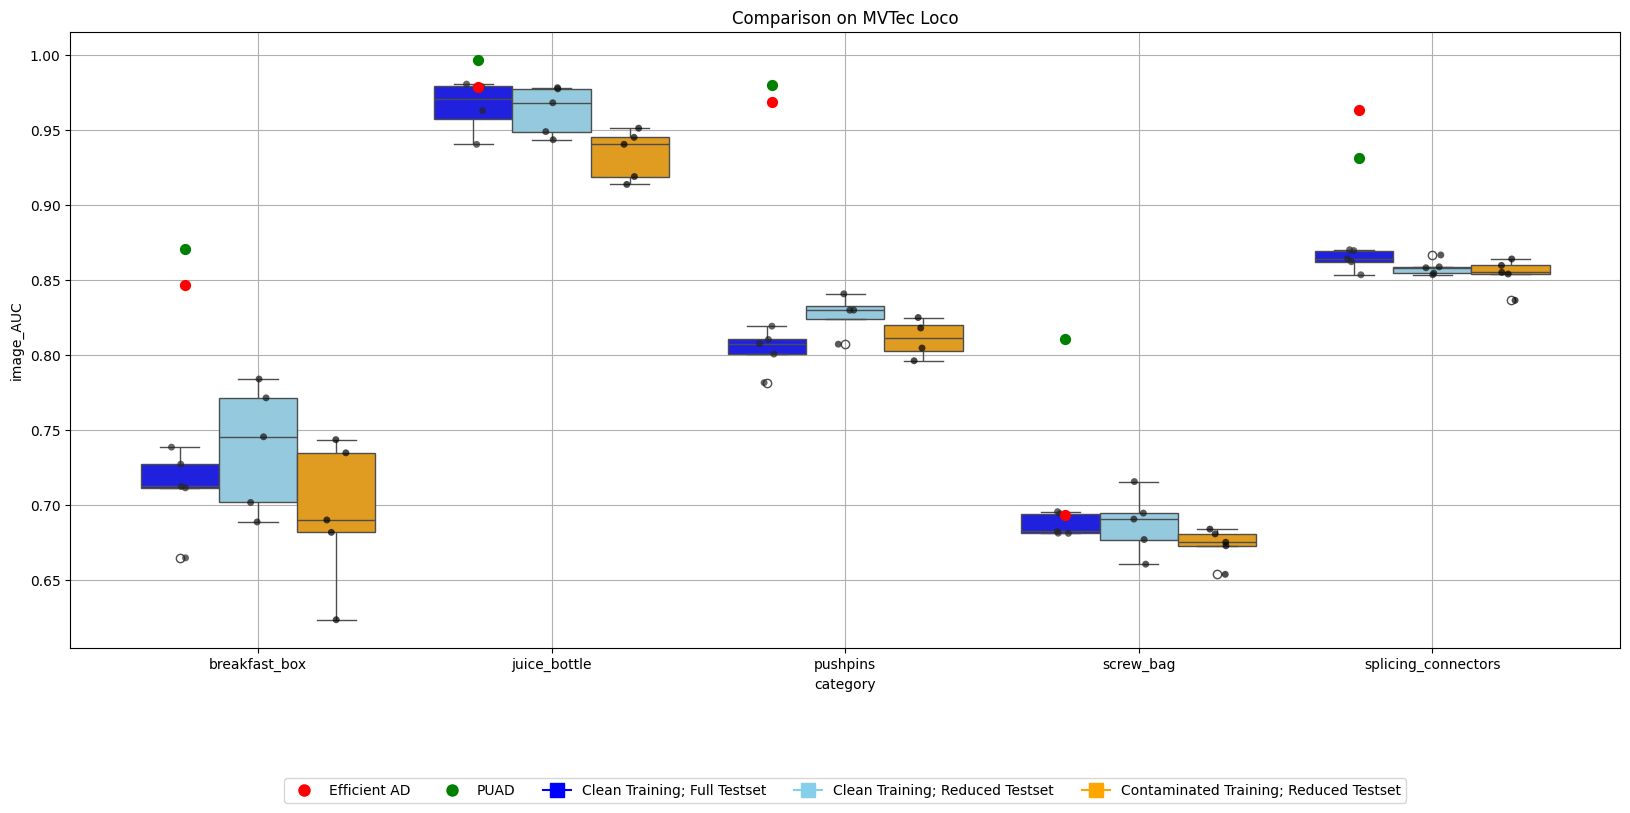

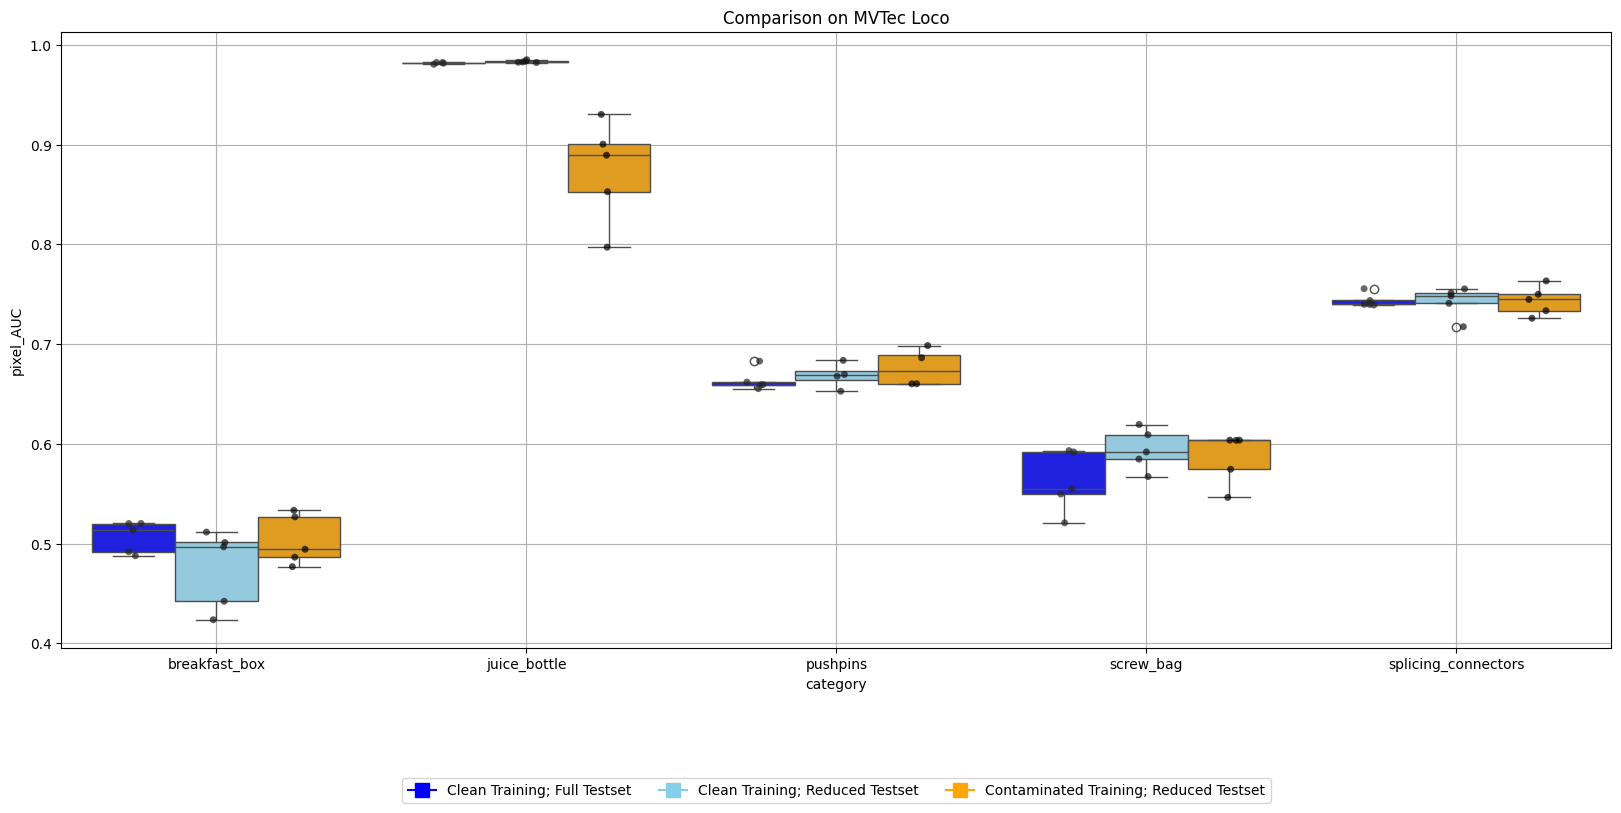

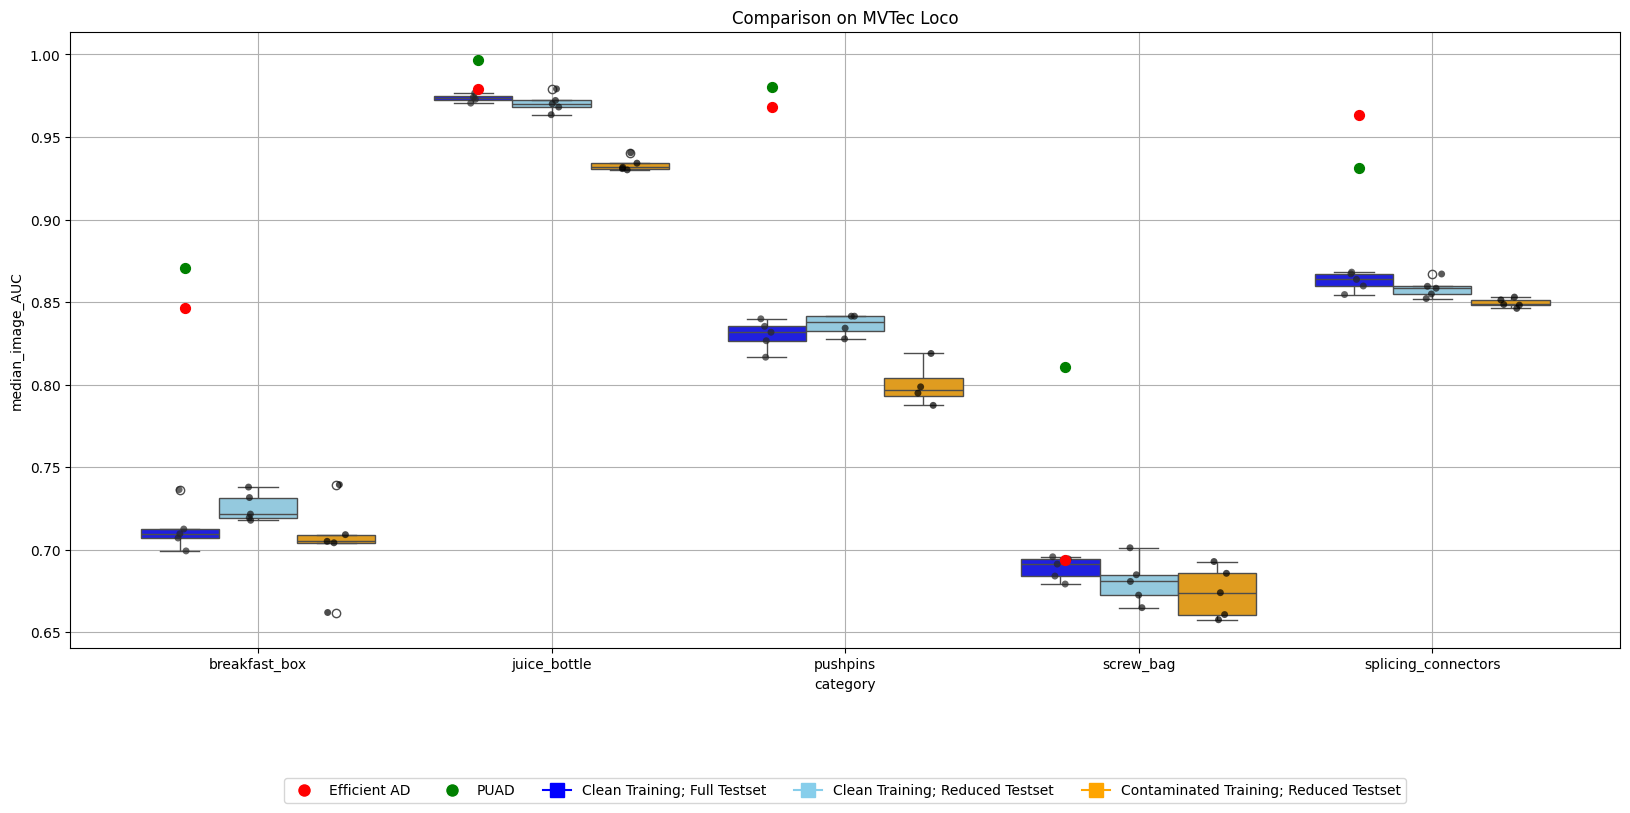

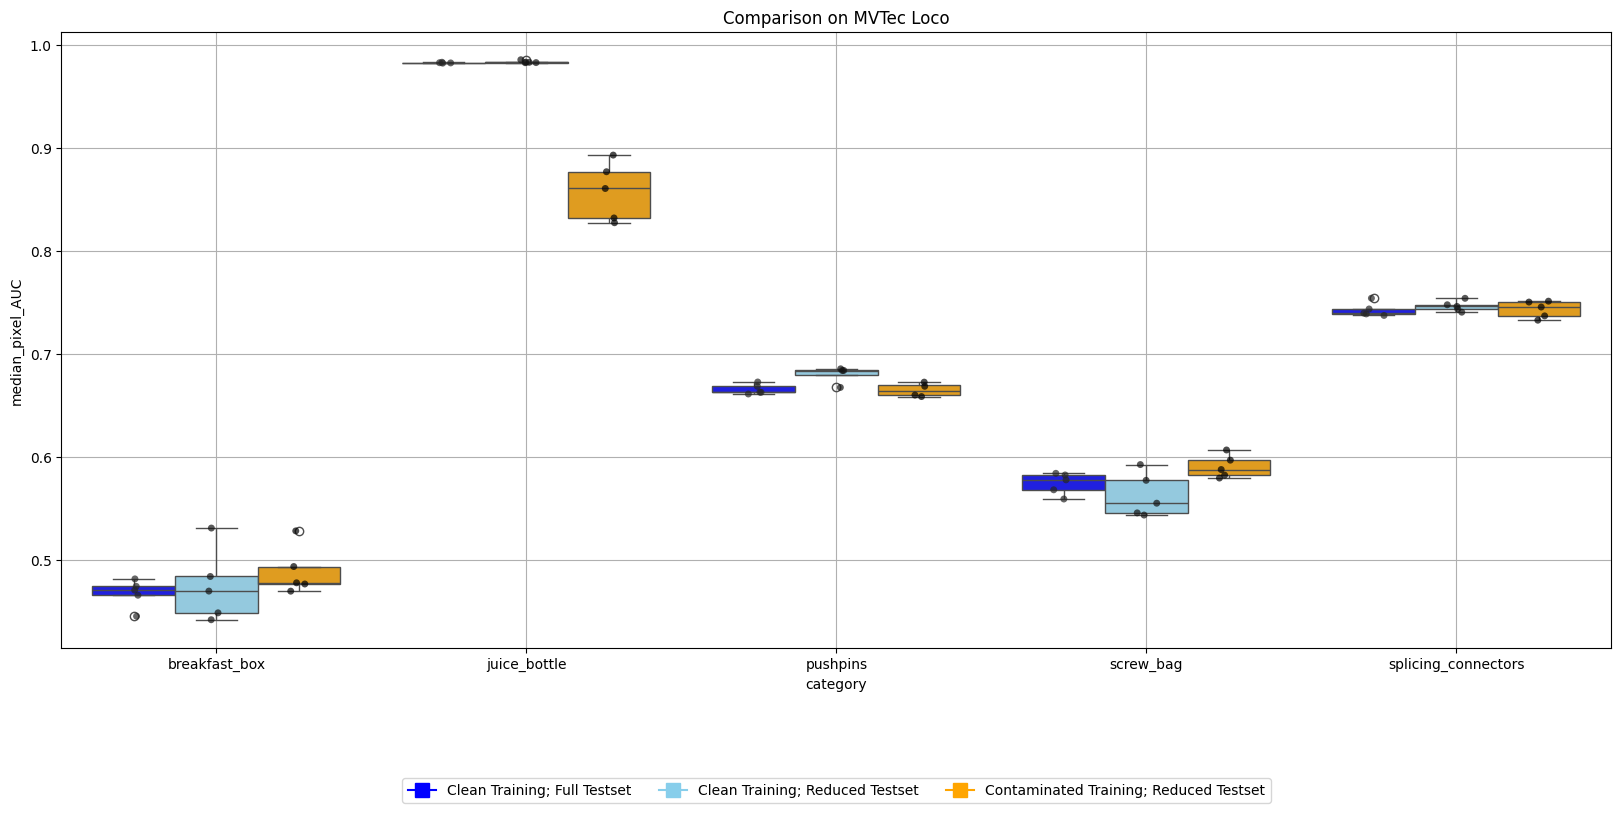

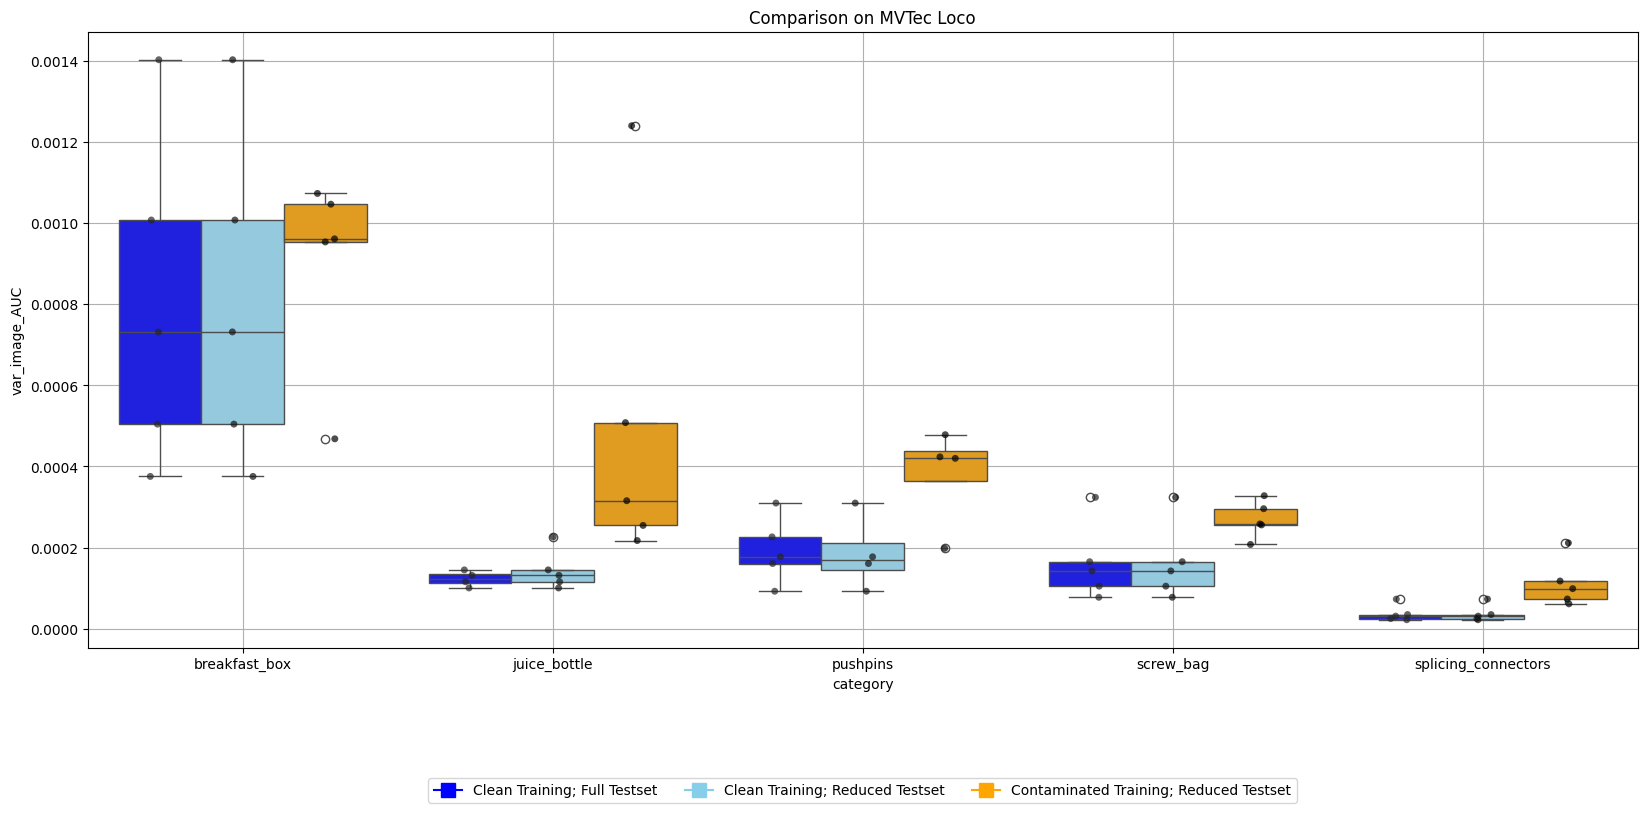

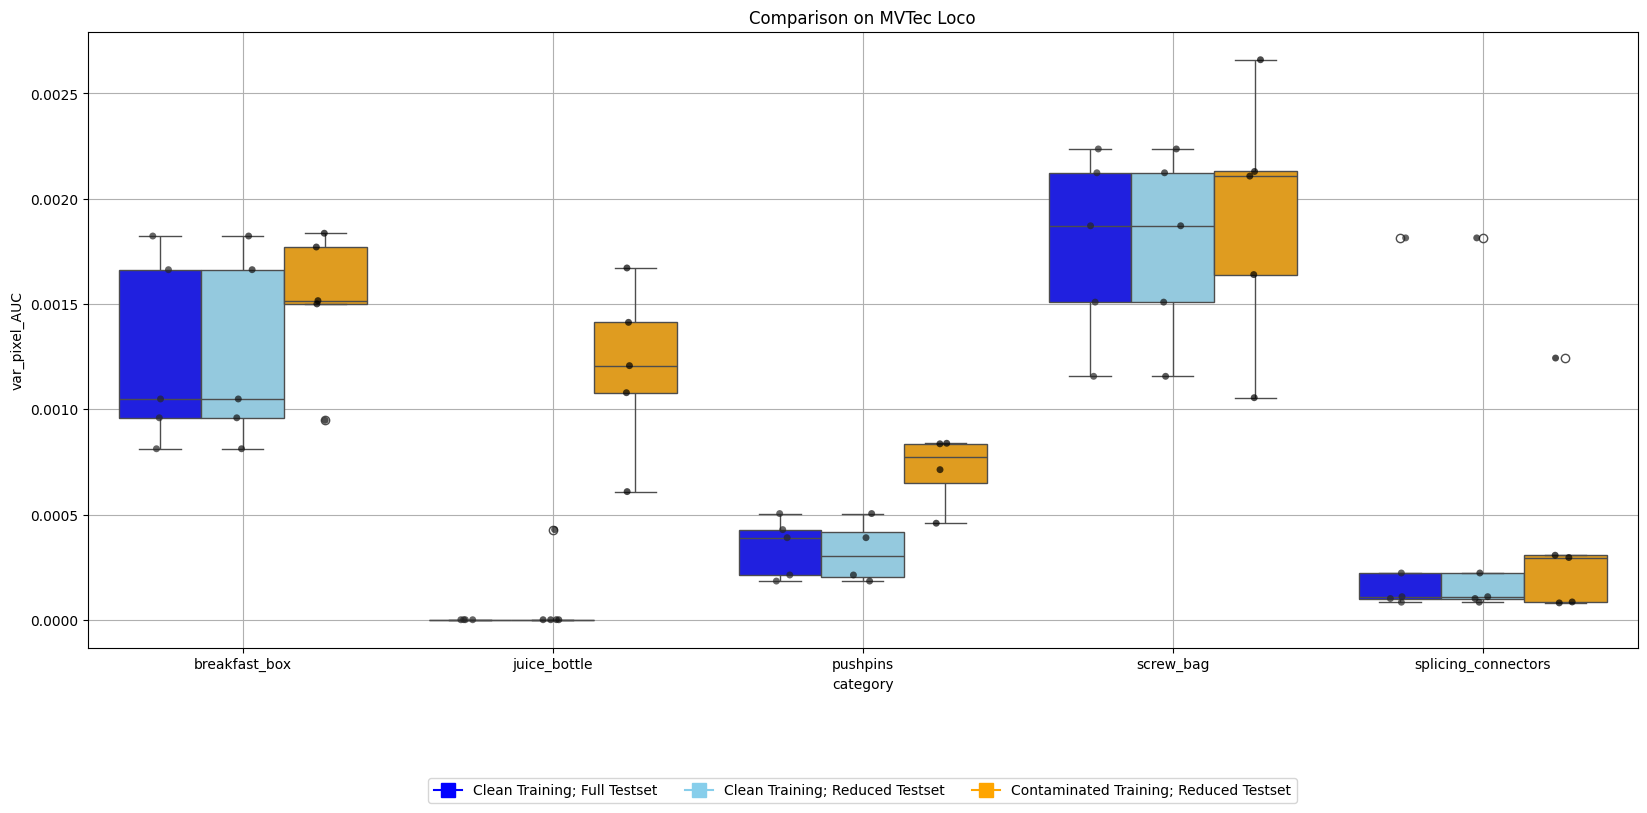

In [7]:
lasteps=allres[allres['epoch']==149]

last20=allres[allres['epoch']>=129]

# clean
last20_clean=last20[last20['setting']=='clean']
last20_clean_subset=last20_clean[['category','run','image_AUC','pixel_AUC']]

last20_clean = last20_clean_subset.groupby(['category', 'run']).median().reset_index()
last20_clean = last20_clean_subset.groupby(['category', 'run']).median().reset_index()
last20_clean['var_image_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_clean['var_pixel_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']
last20_clean['contamination']= ['0']*len(last20_clean)
last20_clean['setting']= ['clean']*len(last20_clean)
last20_clean['postprocessing']= ['original']*len(last20_clean)
last20_clean
# clen reduced

last20_clean_reduced=last20[last20['setting']=='clean_reduced']
last20_clean_reduced_subset=last20_clean_reduced[['category','run','image_AUC','pixel_AUC']]

last20_clean_reduced = last20_clean_reduced_subset.groupby(['category', 'run']).median().reset_index()
last20_clean_reduced['var_image_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_clean_reduced['var_pixel_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']

last20_clean_reduced['contamination']= ['0']*len(last20_clean_reduced)
last20_clean_reduced['setting']= ['clean_reduced']*len(last20_clean_reduced)
last20_clean_reduced['postprocessing']= ['original']*len(last20_clean_reduced)
last20_clean_reduced

# contaminated
last20_contaminated=last20[last20['setting']=='contaminated']
last20_contaminated_subset=last20_contaminated[['category','run','image_AUC','pixel_AUC']]

last20_contaminated = last20_contaminated_subset.groupby(['category', 'run']).median().reset_index()
last20_contaminated['var_image_AUC']=last20_contaminated_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_contaminated['var_pixel_AUC']=last20_contaminated_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']

last20_contaminated['contamination']= ['10']*len(last20_contaminated)
last20_contaminated['setting']= ['contaminated']*len(last20_contaminated)
last20_contaminated['postprocessing']= ['original']*len(last20_contaminated)
last20_contaminated


aggregated_df=pd.concat([last20_clean,last20_clean_reduced,last20_contaminated])

aggregated_df.rename(columns={'image_AUC': 'median_image_AUC'}, inplace=True)
aggregated_df.rename(columns={'pixel_AUC': 'median_pixel_AUC'}, inplace=True)

merged=pd.merge(aggregated_df, lasteps, on=['category', 'run','setting'], suffixes=('_aggregated', '_last'))
merged.pop('postprocessing_aggregated')
merged.pop('contamination_aggregated')
merged.rename(columns={'contamination_last': 'contamination'}, inplace=True)
merged.rename(columns={'postprocessing_last': 'postprocessing'}, inplace=True)

print(merged.head())

########################################################################################################## image
fulldf= merged



auc_EfficicentAD = {'breakfast_box': [0.8464],'juice_bottle': [0.9789],'pushpins': [0.9684],'screw_bag': [0.6936],'splicing_connectors':[0.9633]}
auc_PUAD = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


for category, auc in auc_EfficicentAD.items():
    x_position = list(res_df_end['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

for category, auc in auc_PUAD.items():
    x_position = list(res_df_end['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='green', s=50, marker='o', zorder=4, linewidths=1)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Efficient AD', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='PUAD', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="pixel_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

legend_elements = [
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


########################################################################################################## pixel
fulldf= merged


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="median_image_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="median_image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


for category, auc in auc_EfficicentAD.items():
    x_position = list(merged['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='red', s=50, marker='o', zorder=4, linewidths=1)

for category, auc in auc_PUAD.items():
    x_position = list(merged['category'].unique()).index(category) - 0.25
    ax.scatter(x=x_position, y=auc, color='green', s=50, marker='o', zorder=4, linewidths=1)


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Efficient AD', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='PUAD', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="median_pixel_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="median_pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

legend_elements = [
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


###########################################################################vars

plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="var_image_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="var_image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)



legend_elements = [

    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="var_pixel_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="var_pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

legend_elements = [
    plt.Line2D([0], [0], marker='s', color='blue',  label='Clean Training; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Training; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Training; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title('Comparison on MVTec Loco')
plt.grid(True)


breakfast_box
juice_bottle
pushpins
screw_bag
splicing_connectors
              category  image_median_clean  image_median_contaminated  \
0        breakfast_box            0.745540                   0.690108   
1         juice_bottle            0.968139                   0.940447   
2             pushpins            0.829935                   0.811369   
3            screw_bag            0.690689                   0.675262   
4  splicing_connectors            0.858193                   0.855097   

   pixel_median_clean  pixel_median_contaminated  image_difference  \
0            0.496738                   0.494306          0.043506   
1            0.982932                   0.889429          0.029338   
2            0.668724                   0.673269          0.015995   
3            0.591853                   0.603514          0.014376   
4            0.748439                   0.744793          0.004511   

   pixel_difference  t_stat_image  p_value_image  t_stat_pixel  ...  \
0  

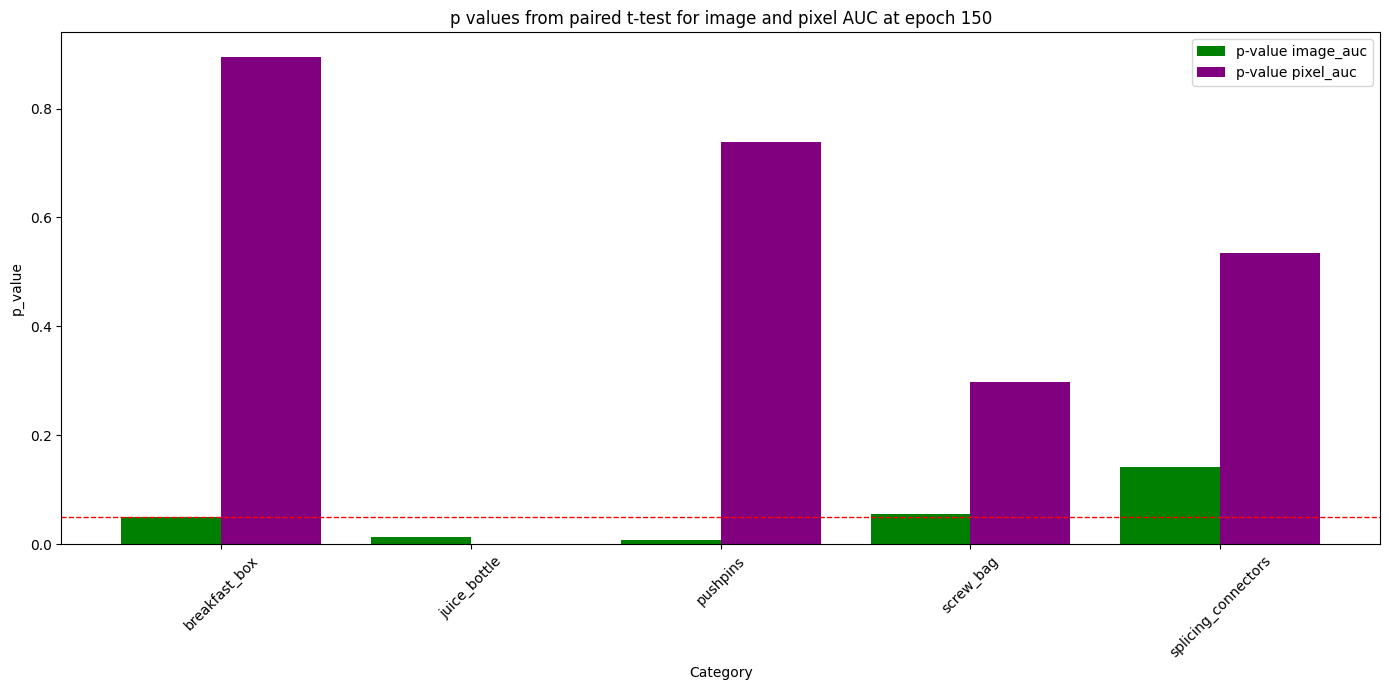

In [8]:
lasteps=merged#allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']

# Joining the conts and cleans DataFrames on 'run' and 'category'
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))

# Displaying the result
joined_df.head()





df = paired_t_test_per_category(joined_df, 'category')

# df.to_csv('/home/bule/projects/UTRAD/results/mvtec_loco/allresults/paired_t_test_data.csv', index=False)
print(df)


# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Width for bars
bar_width = 0.4
index = range(len(df['category']))

# p_value_image plot
ax.bar([i - bar_width/2 for i in index], df['p_value_image'], bar_width, color='green', label='p-value image_auc')

# p_value_pixel plot
ax.bar([i + bar_width/2 for i in index], df['p_value_pixel'], bar_width, color='purple', label='p-value pixel_auc')

# Adding the red dashed line at y=0.05
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=1)

# Adding title and labels
ax.set_title('p values from paired t-test for image and pixel AUC at epoch 150')
ax.set_xlabel('Category')
ax.set_ylabel('p_value')
ax.set_xticks(index)
ax.set_xticklabels(df['category'])
ax.tick_params(axis='x', rotation=45)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


In [9]:
lasteps=merged
cleans=lasteps[lasteps['setting']=='clean']
df_selected = cleans[['category', 'median_image_AUC']]
mean_over_categories = df_selected.groupby('category').mean()
mean_over_categories.mean()

median_image_AUC    0.813578
dtype: float64

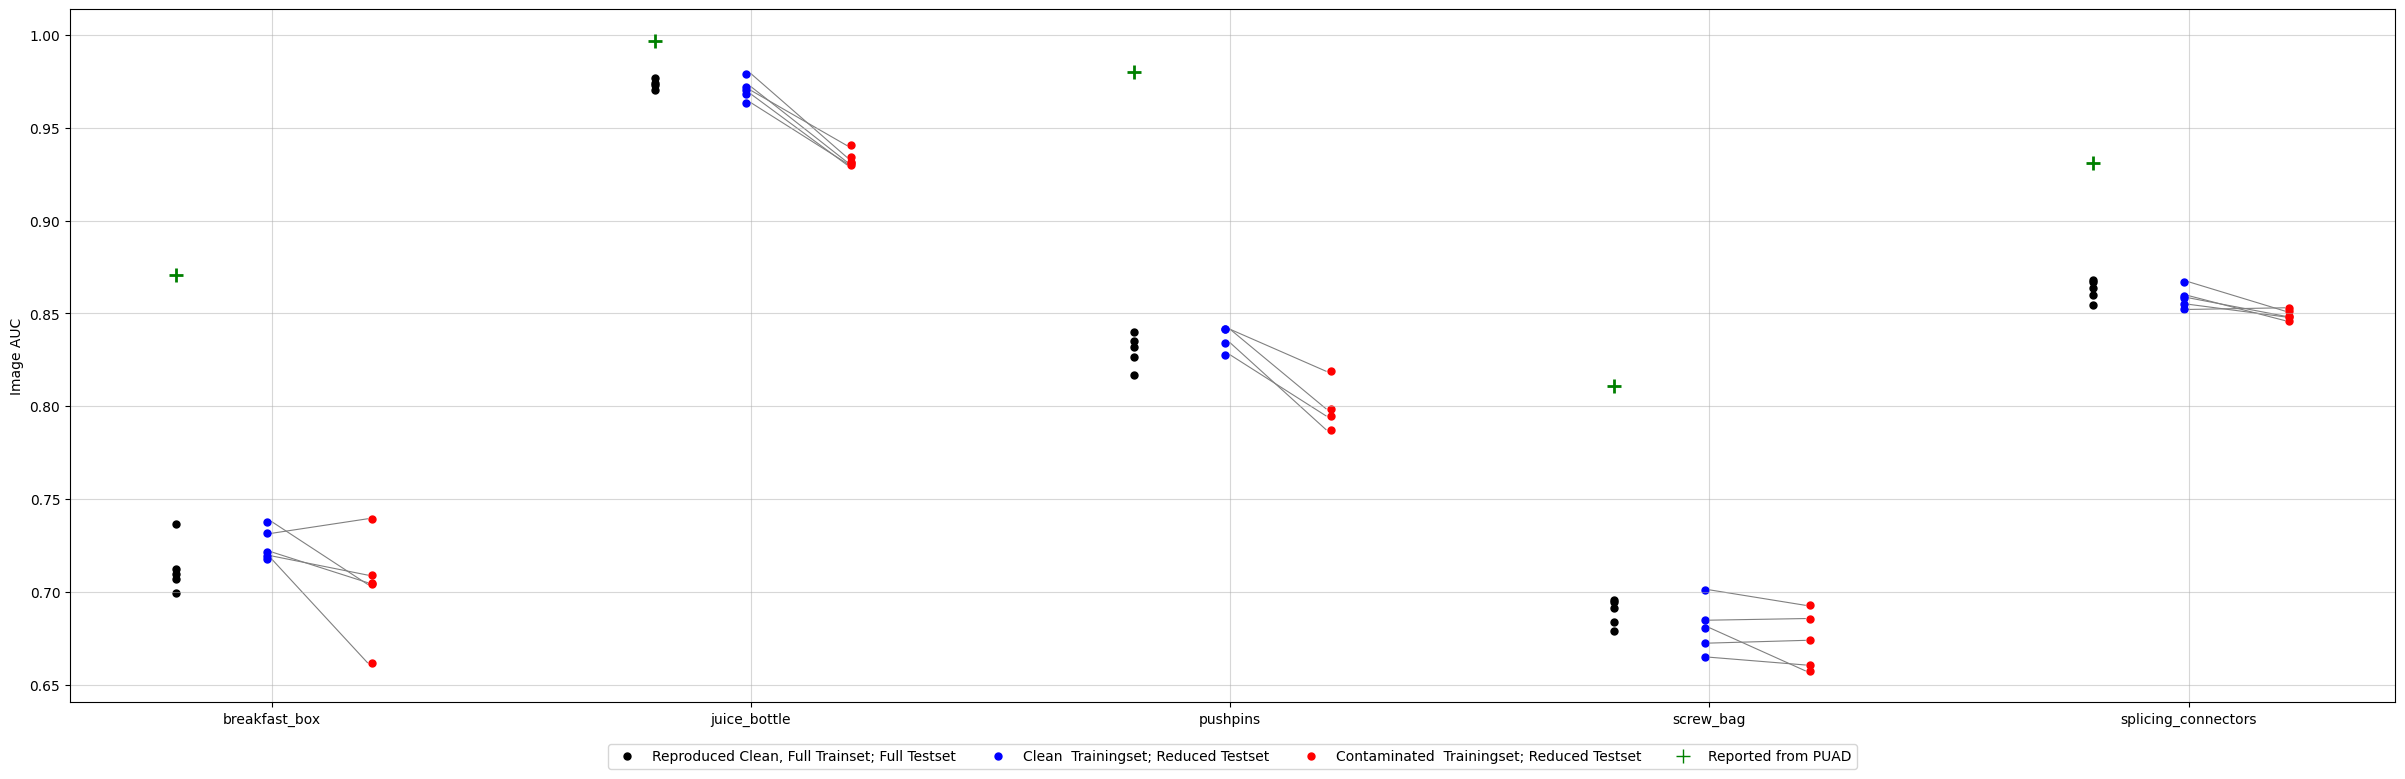

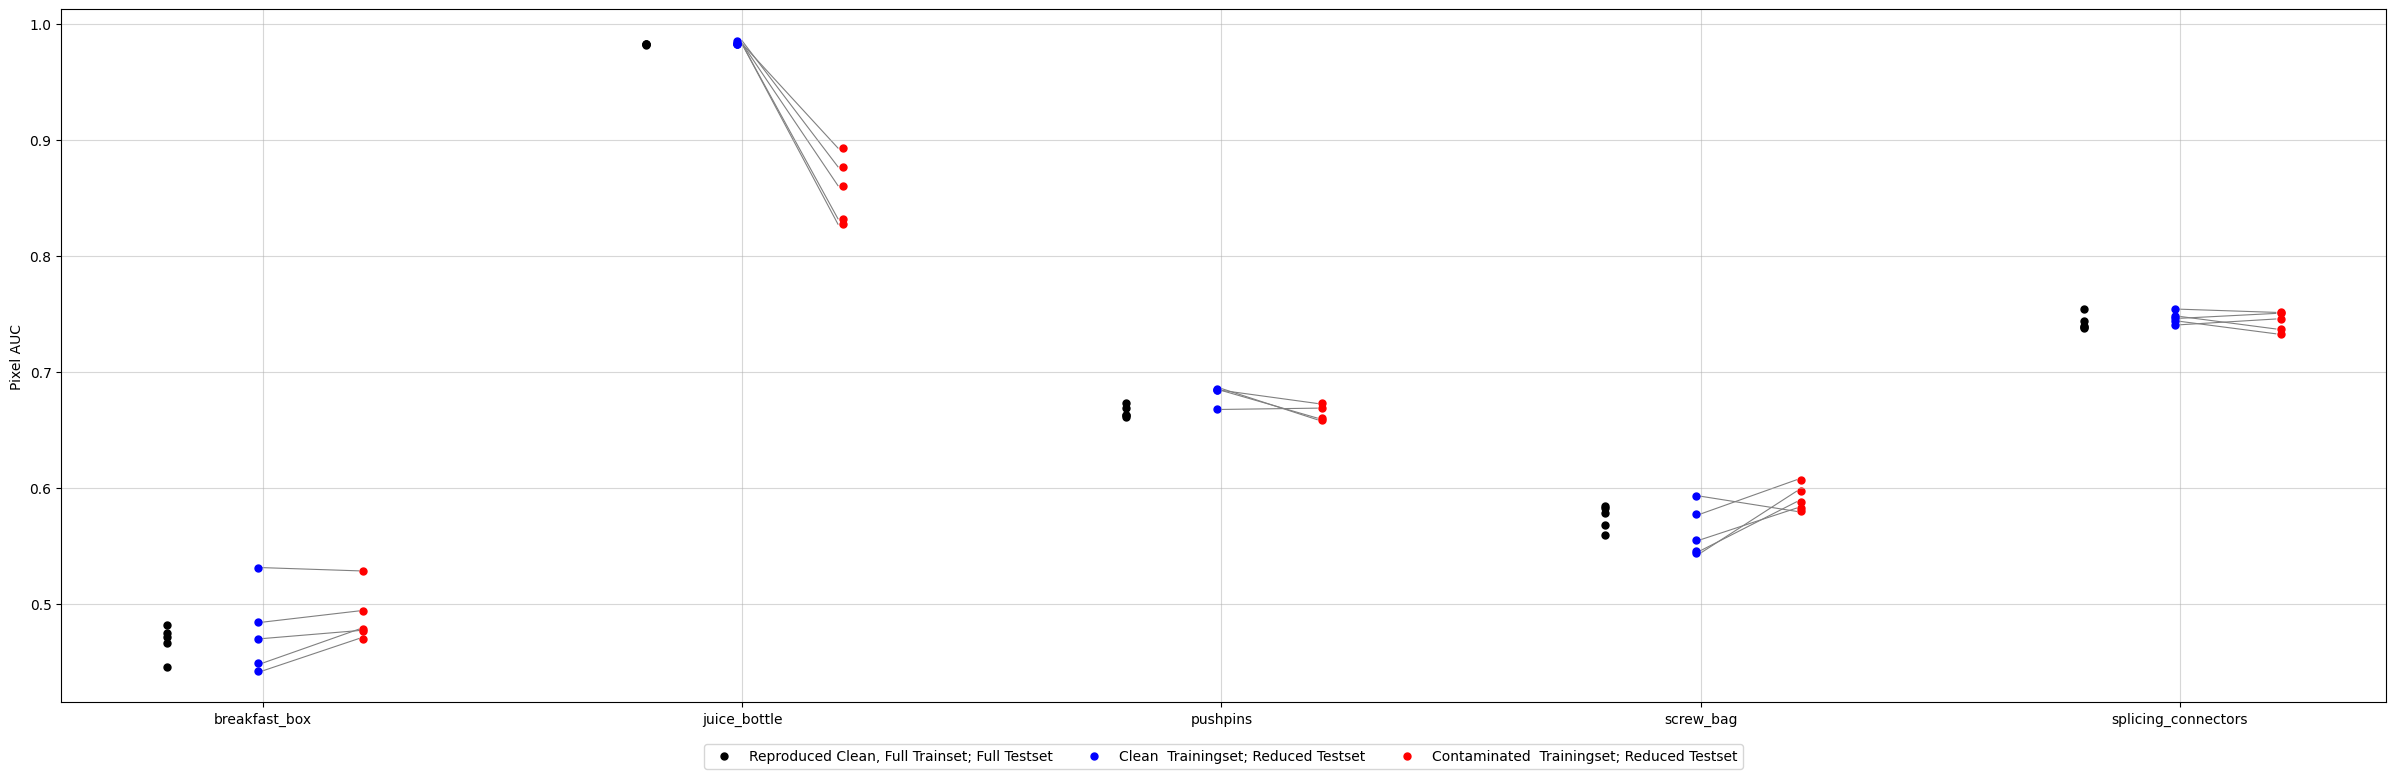

In [10]:
df=merged
fig, ax = plt.subplots(figsize=(30, 9))


auc_paper = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}



sites = []
i = 1
legend_added = {'clean': False, 'clean_reduced': False, 'contaminated': False}

for site, subdf in df.groupby('category'):
    sites.append(site)
    # Get the values for different settings
    h = subdf.query('setting == "clean_reduced"')['median_image_AUC'].values
    d = subdf.query('setting == "contaminated"')['median_image_AUC'].values
    clean = subdf.query('setting == "clean"')['median_image_AUC'].values

    # Ensure data completeness
    if len(h) == 0 or len(d) == 0 or len(clean) == 0:
        continue

    # Set up the x-axis values
    x1 = i + 0.0
    x2 = i + 0.2
    x0 = i -0.2

    # Plot clean data
    ax.scatter(len(clean)*[x0], clean, color='black', s=25,
               label='Clean' if not legend_added['clean'] else "")
    legend_added['clean'] = True

    # Plot the lines connecting clean_reduced and disease
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], color='gray',linewidth=0.8, zorder=1)

    # Plot clean_reduced and disease points
    ax.scatter(len(h)*[x1-0.01], h, color='blue', s=25,
               label='Clean Reduced' if not legend_added['clean_reduced'] else "")
    ax.scatter(len(d)*[x2+0.01], d, color='red', s=25,
               label='Contaminated' if not legend_added['contaminated'] else "")

    legend_added['clean_reduced'] = True
    legend_added['contaminated'] = True

    # Update x-axis
    i += 1

for category, auc in auc_paper.items():
    x_position = list(fulldf['category'].unique()).index(category) +0.8
    ax.scatter(x=x_position, y=auc, color='green', s=100, marker='+', zorder=4, linewidths=2)

legend_elements = [
    plt.Line2D([0], [0], marker='.', color='black', label='Reproduced Clean, Full Trainset; Full Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='blue', label='Clean  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='red', label='Contaminated  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='+', color='green', label='Reported from PUAD', markersize=10, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Fix the axes and labels
ax.set_xticks(np.arange(1, len(sites) + 1))
ax.set_xticklabels(sites)
ax.set_ylabel('Image AUC')
# ax.legend()
ax.grid(True, zorder=0,alpha=0.5)
plt.show()


df=merged
fig, ax = plt.subplots(figsize=(30, 9))


auc_paper = {'breakfast_box': [0.8707],'juice_bottle': [0.9968],'pushpins': [0.9802],'screw_bag': [0.8107],'splicing_connectors':[0.9312]}



sites = []
i = 1
legend_added = {'clean': False, 'clean_reduced': False, 'contaminated': False}

for site, subdf in df.groupby('category'):
    sites.append(site)
    # Get the values for different settings
    h = subdf.query('setting == "clean_reduced"')['median_pixel_AUC'].values
    d = subdf.query('setting == "contaminated"')['median_pixel_AUC'].values
    clean = subdf.query('setting == "clean"')['median_pixel_AUC'].values

    # Ensure data completeness
    if len(h) == 0 or len(d) == 0 or len(clean) == 0:
        continue

    # Set up the x-axis values
    x1 = i + 0.0
    x2 = i + 0.2
    x0 = i -0.2

    # Plot clean data
    ax.scatter(len(clean)*[x0], clean, color='black', s=25,
               label='Clean' if not legend_added['clean'] else "")
    legend_added['clean'] = True

    # Plot the lines connecting clean_reduced and disease
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], color='gray',linewidth=0.8, zorder=1)

    # Plot clean_reduced and disease points
    ax.scatter(len(h)*[x1-0.01], h, color='blue', s=25,
               label='Clean Reduced' if not legend_added['clean_reduced'] else "")
    ax.scatter(len(d)*[x2+0.01], d, color='red', s=25,
               label='Contaminated' if not legend_added['contaminated'] else "")

    legend_added['clean_reduced'] = True
    legend_added['contaminated'] = True

    # Update x-axis
    i += 1


legend_elements = [
    plt.Line2D([0], [0], marker='.', color='black', label='Reproduced Clean, Full Trainset; Full Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='blue', label='Clean  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='red', label='Contaminated  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Fix the axes and labels
ax.set_xticks(np.arange(1, len(sites) + 1))
ax.set_xticklabels(sites)
ax.set_ylabel('Pixel AUC')
# ax.legend()
ax.grid(True, zorder=0,alpha=0.5)
plt.show()

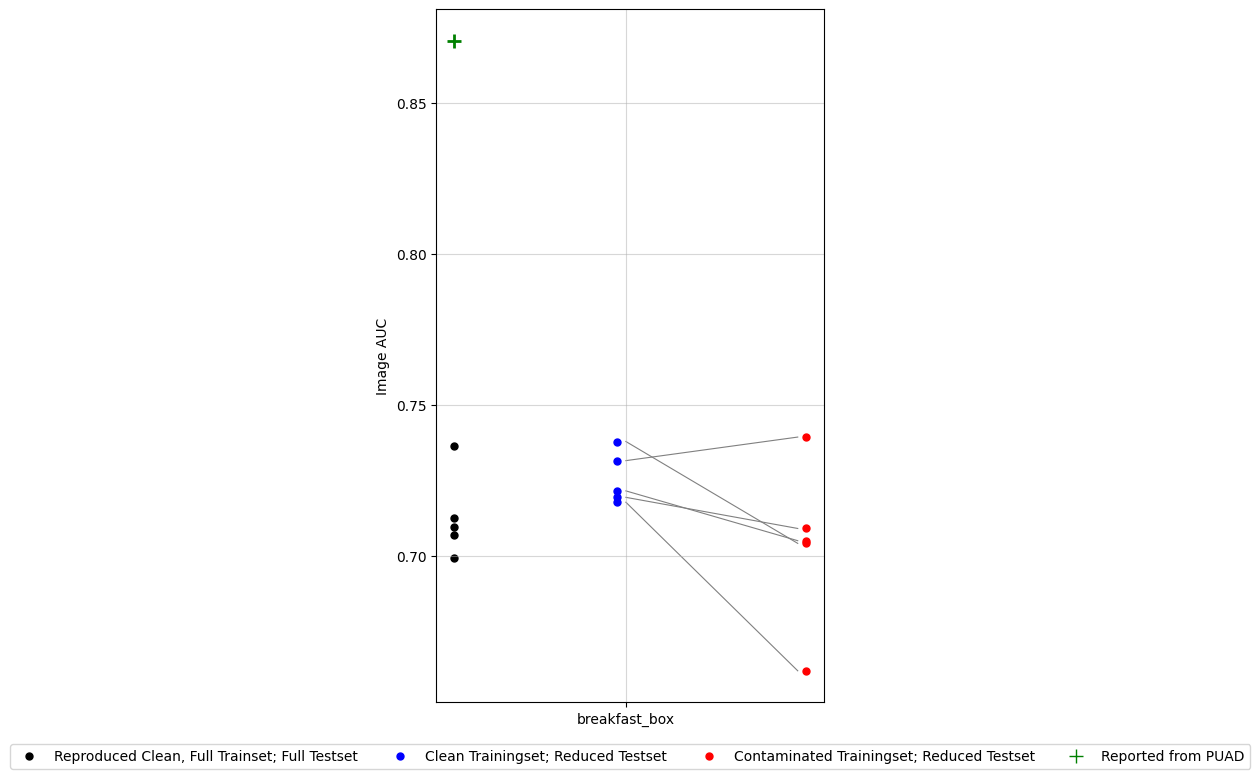

In [23]:
import matplotlib.pyplot as plt
import numpy as np

df = merged  # Assuming 'merged' is your dataframe containing the necessary data

# Filter for only 'breakfast_box', 'screw_bag', and 'splicing_connectors' categories
df = df[df['category'].isin(['breakfast_box' ])]

fig, ax = plt.subplots(figsize=(5, 9))

auc_paper = {
    'breakfast_box': [0.8707],
    'juice_bottle': [0.9968],
    'pushpins': [0.9802],
    'screw_bag': [0.8107],
    'splicing_connectors': [0.9312]
}

# Filter auc_paper to only include 'breakfast_box', 'screw_bag', and 'splicing_connectors'
auc_paper = {k: v for k, v in auc_paper.items() if k in ['breakfast_box']}

sites = []
i = 1
legend_added = {'clean': False, 'clean_reduced': False, 'contaminated': False}

for site, subdf in df.groupby('category'):
    sites.append(site)
    # Get the values for different settings
    h = subdf.query('setting == "clean_reduced"')['median_image_AUC'].values
    d = subdf.query('setting == "contaminated"')['median_image_AUC'].values
    clean = subdf.query('setting == "clean"')['median_image_AUC'].values

    # Ensure data completeness
    if len(h) == 0 or len(d) == 0 or len(clean) == 0:
        continue

    # Set up the x-axis values
    x1 = i + 0.0
    x2 = i + 0.2
    x0 = i - 0.2

    # Plot clean data
    ax.scatter(len(clean) * [x0], clean, color='black', s=25,
               label='Clean' if not legend_added['clean'] else "")
    legend_added['clean'] = True

    # Plot the lines connecting clean_reduced and contaminated
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], color='gray', linewidth=0.8, zorder=1)

    # Plot clean_reduced and contaminated points
    ax.scatter(len(h) * [x1 - 0.01], h, color='blue', s=25,
               label='Clean Reduced' if not legend_added['clean_reduced'] else "")
    ax.scatter(len(d) * [x2 + 0.01], d, color='red', s=25,
               label='Contaminated' if not legend_added['contaminated'] else "")

    legend_added['clean_reduced'] = True
    legend_added['contaminated'] = True

    # Update x-axis
    i += 1

for category, auc in auc_paper.items():
    x_position = list(df['category'].unique()).index(category) + 0.8
    ax.scatter(x=x_position, y=auc, color='green', s=100, marker='+', zorder=4, linewidths=2)

legend_elements = [
    plt.Line2D([0], [0], marker='.', color='black', label='Reproduced Clean, Full Trainset; Full Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='blue', label='Clean Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='red', label='Contaminated Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='+', color='green', label='Reported from PUAD', markersize=10, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Fix the axes and labels
ax.set_xticks(np.arange(1, len(sites) + 1))
ax.set_xticklabels(sites)
ax.set_ylabel('Image AUC')
ax.grid(True, zorder=0, alpha=0.5)
plt.show()


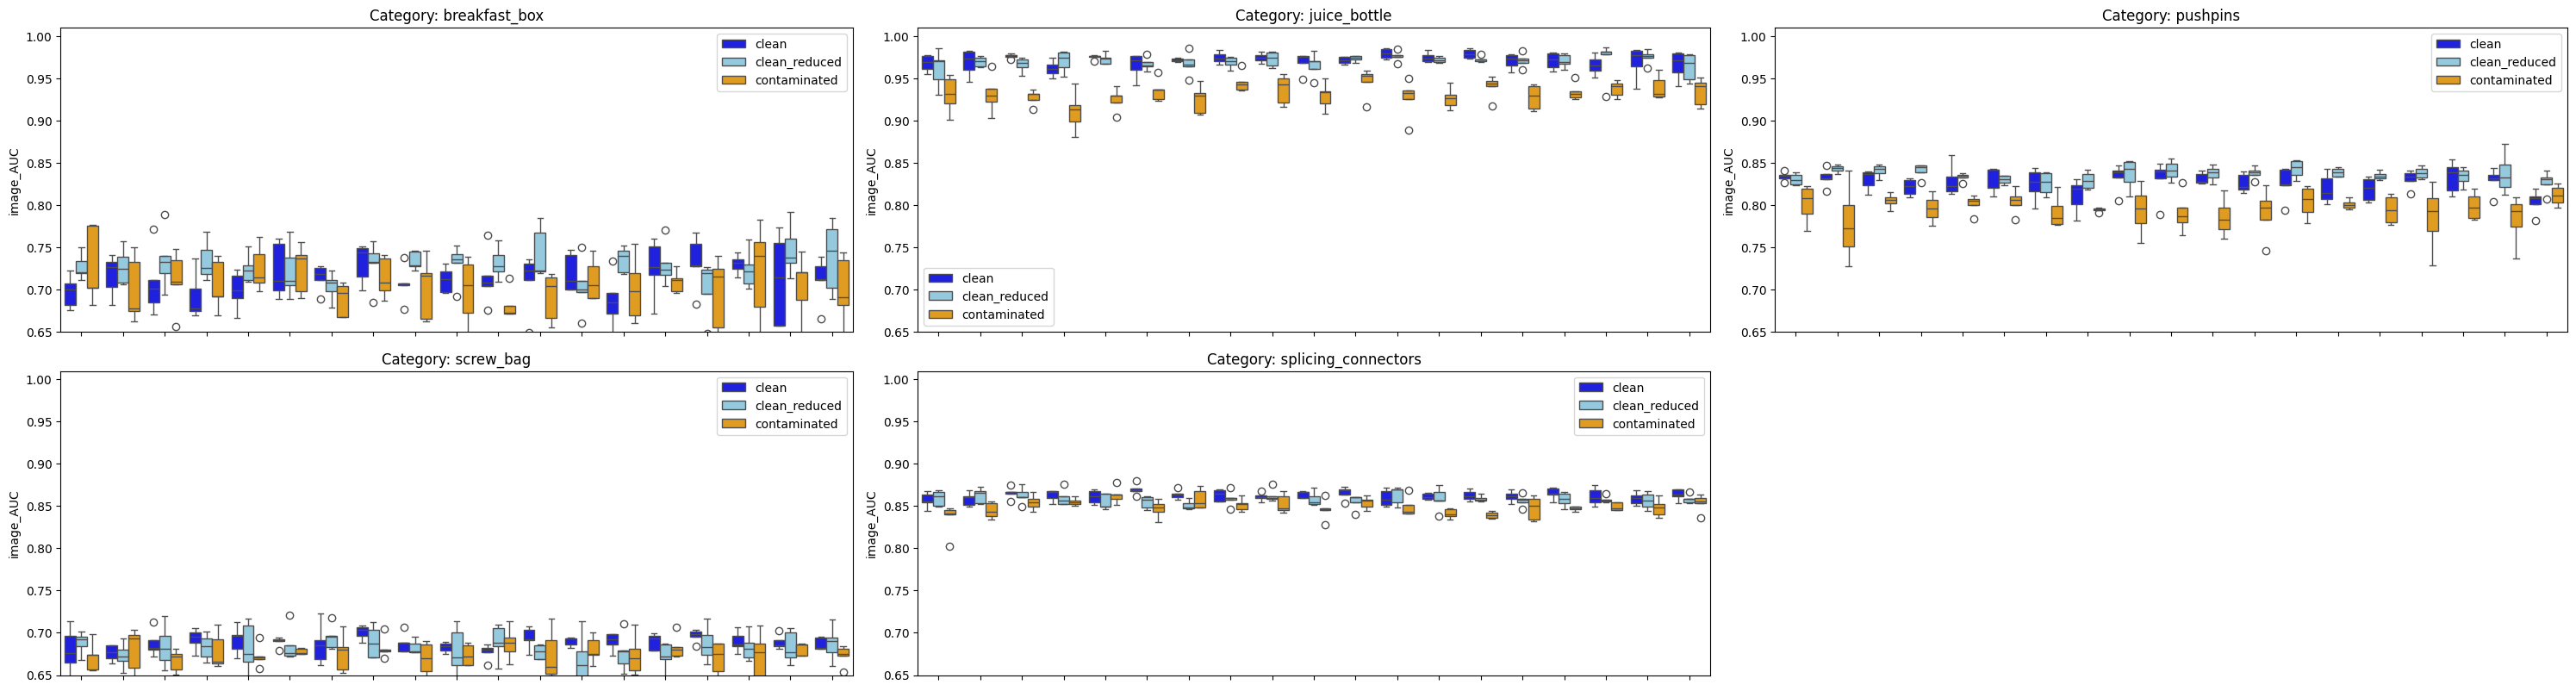

In [12]:
allres_epochs = allres[allres['epoch'] > 130]
categories =allres['category'].unique()
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()
hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}


for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="image_AUC", hue="setting", data=allres_cat, ax=ax,hue_order=hue_order,palette=palette)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65,1.01)
for ax in axes[len(categories):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()


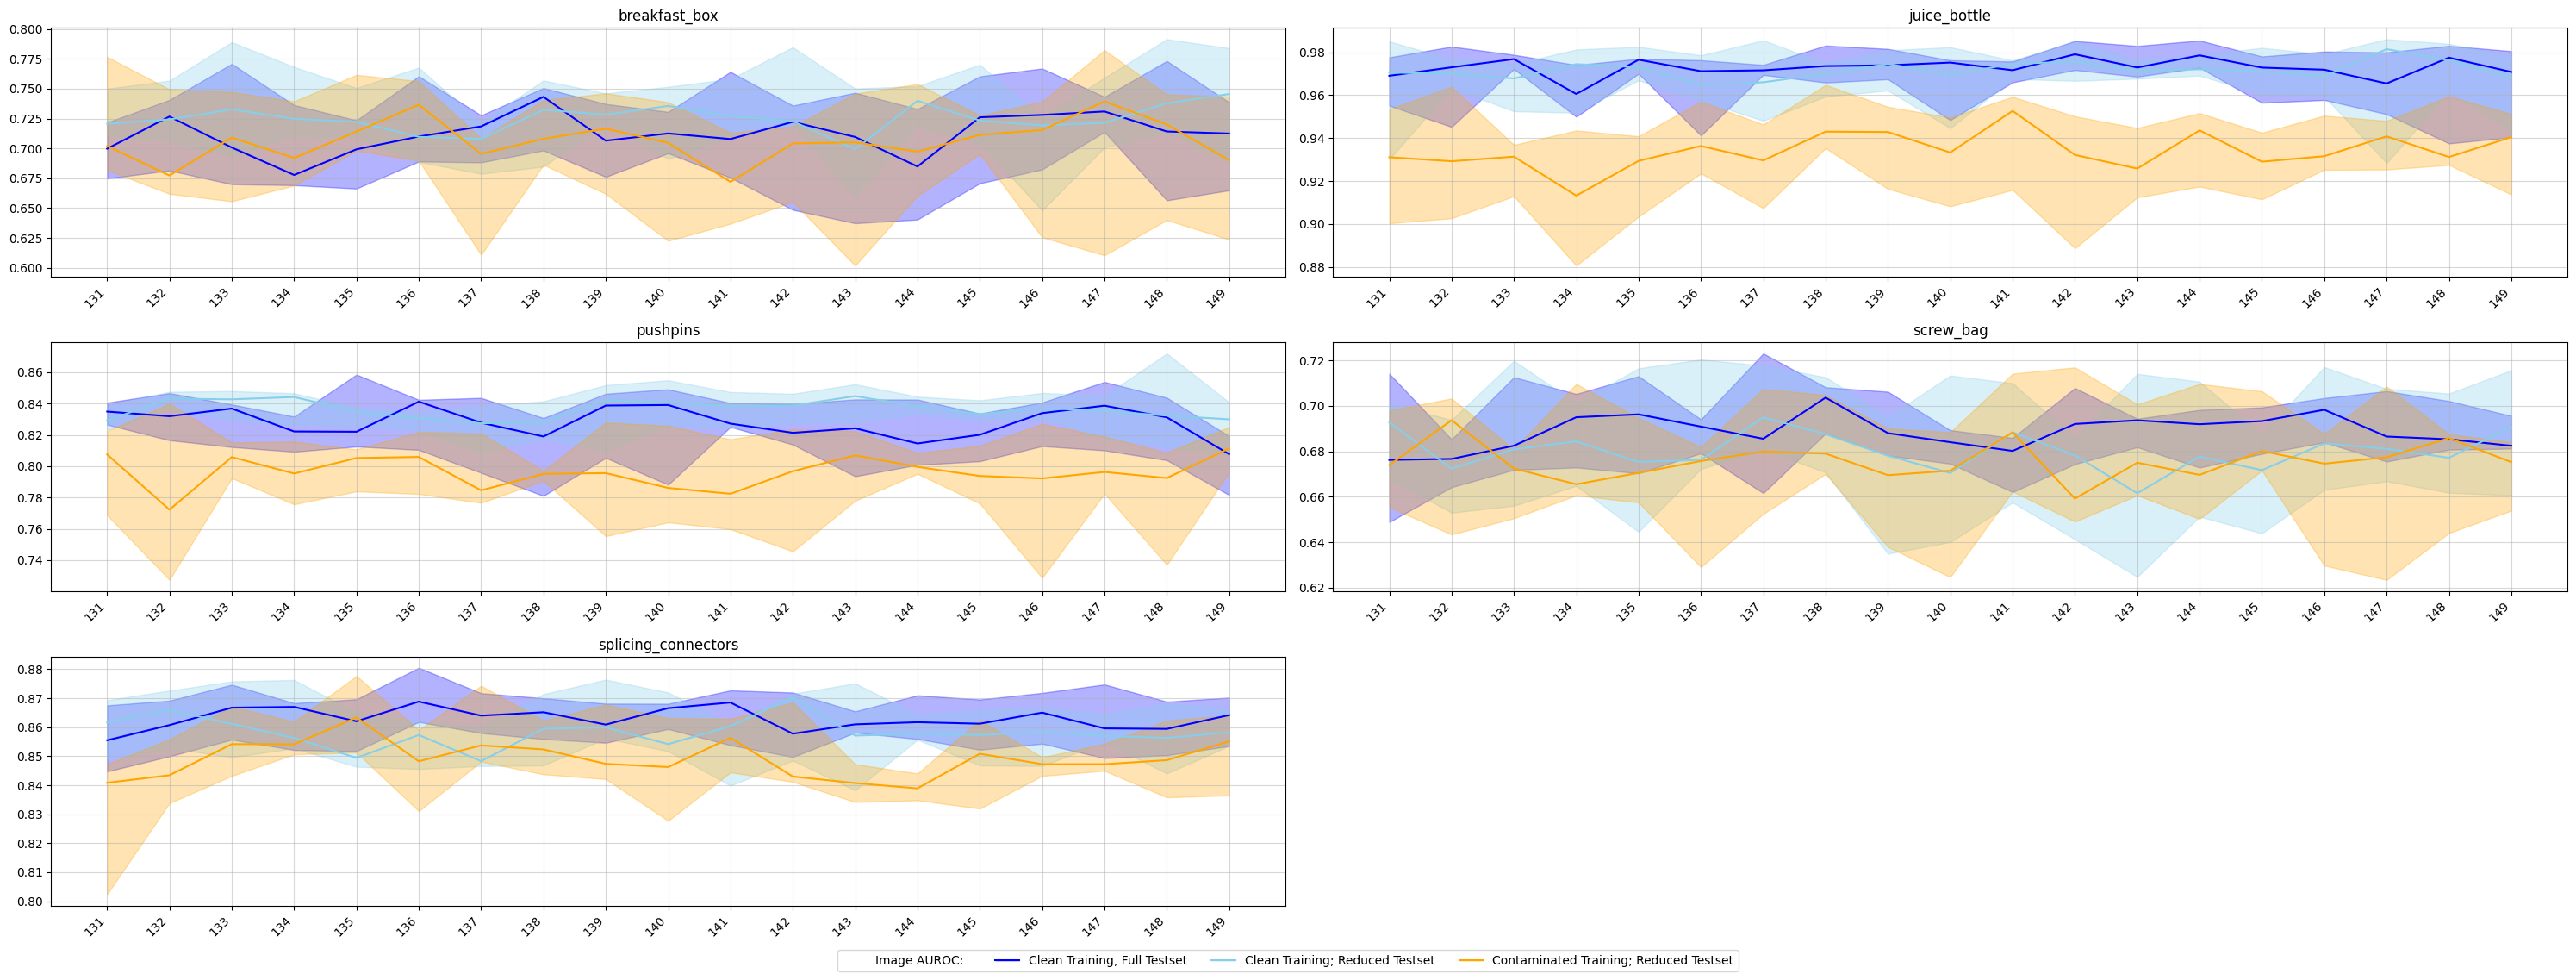

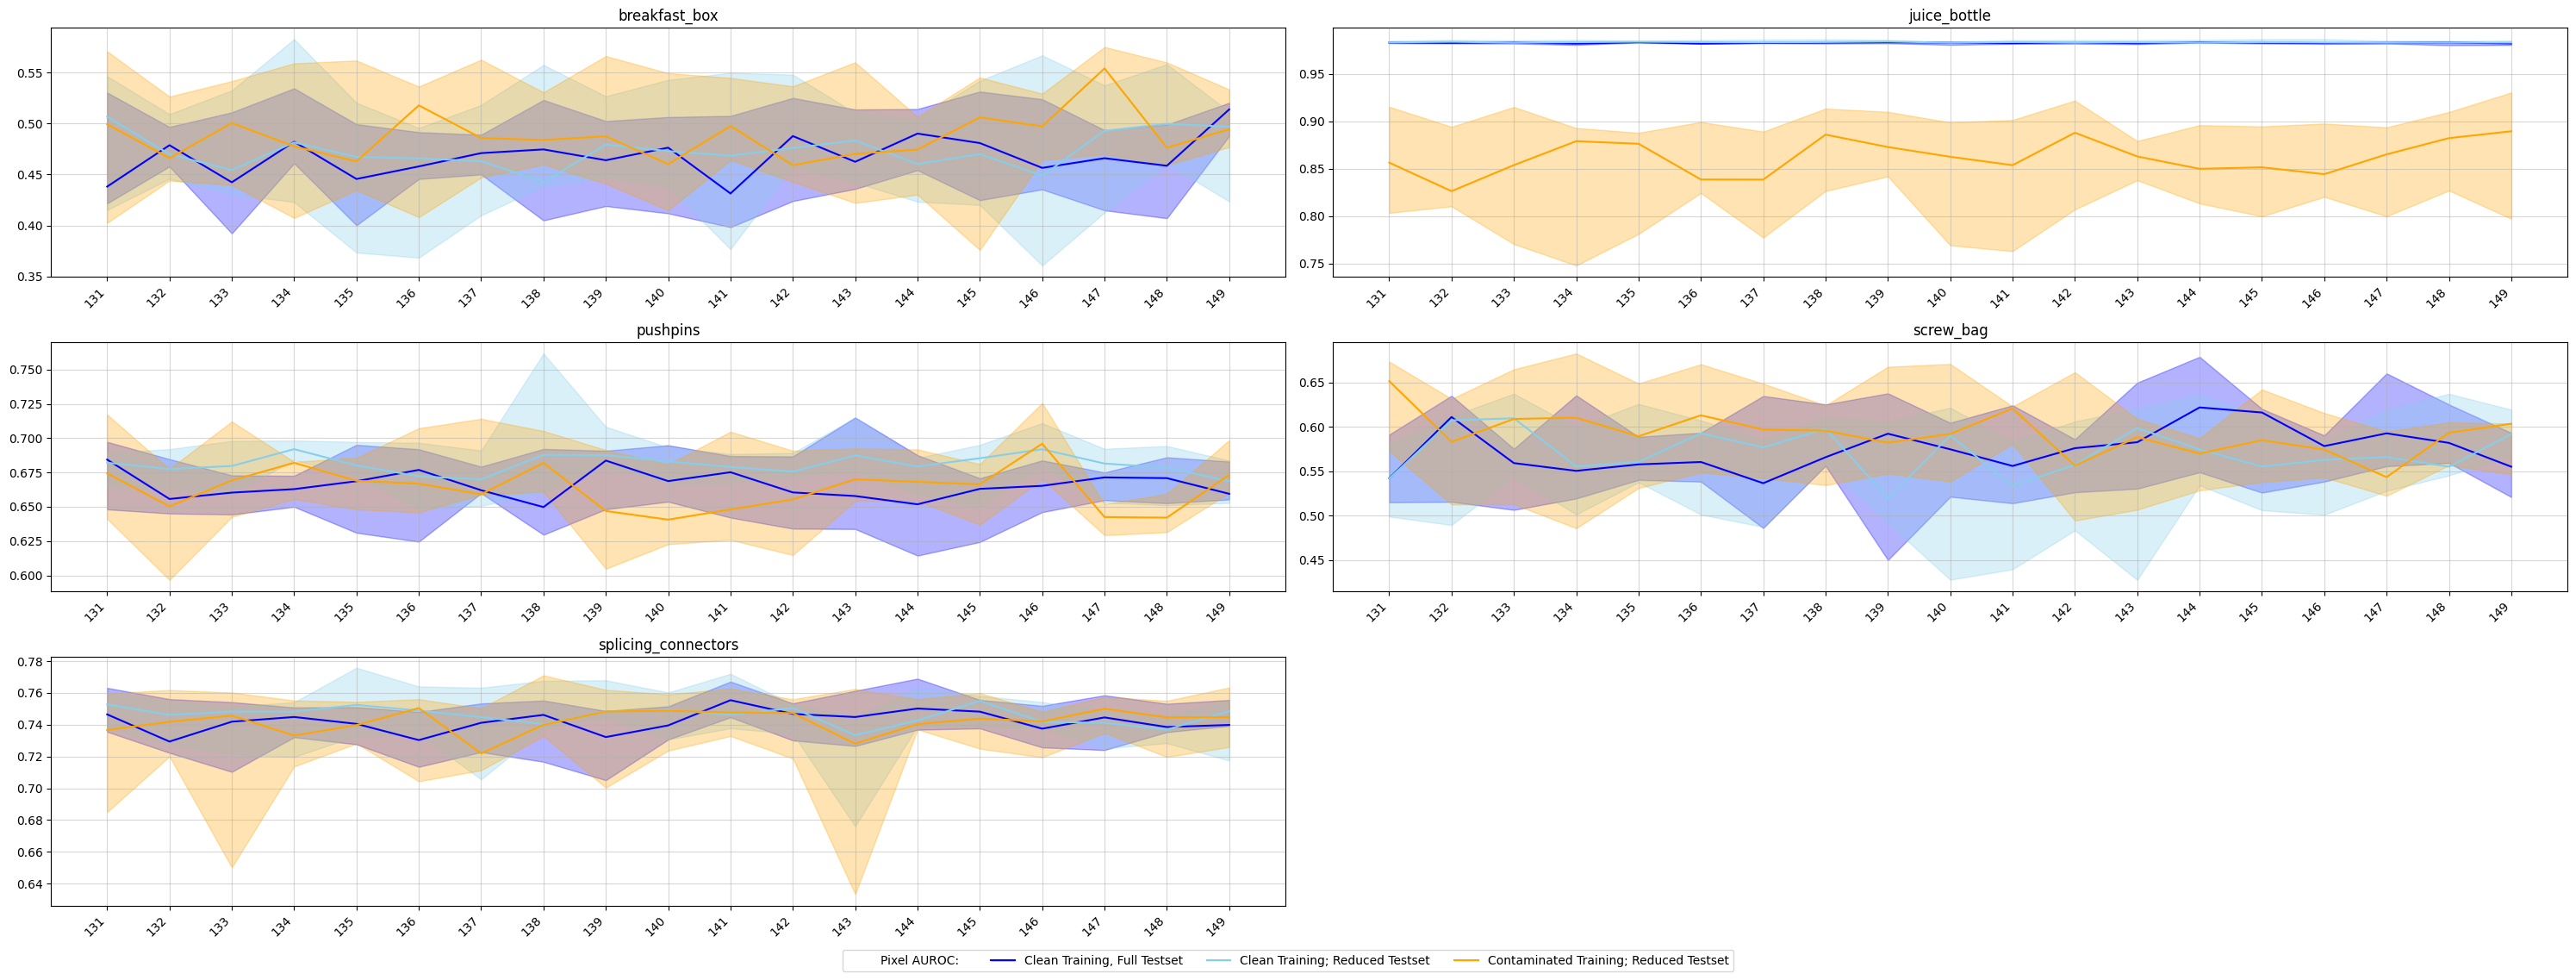

In [13]:
import matplotlib.pyplot as plt

# Assuming allres_epochs, categories, hue_order, and palette are predefined
fig, axes = plt.subplots(5, 2, figsize=(30, 20))
axes = axes.flatten()

def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'{category}')
    ax.grid(True, zorder=1,alpha=0.5)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

# Create custom legend elements
legend_elements = [plt.Line2D([0], [0], marker=' ', color='w', label='Image AUROC:  ', markerfacecolor='w', markersize=20),
    plt.Line2D([0], [0], marker='_', color='blue', label='Clean Training, Full Testset', markerfacecolor='blue', markersize=20),
    plt.Line2D([0], [0], marker='_', color='skyblue',  label='Clean Training; Reduced Testset', markerfacecolor='skyblue', markersize=20),
    plt.Line2D([0], [0], marker='_', color='orange',  label='Contaminated Training; Reduced Testset', markerfacecolor='orange', markersize=20),
]

# Create a single legend below all subplots
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=4)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for x-tick labels and legend
plt.show()

import matplotlib.pyplot as plt

# Assuming allres_epochs, categories, hue_order, and palette are predefined
fig, axes = plt.subplots(5, 2, figsize=(30, 20))
axes = axes.flatten()

def calculate_stats(data):
    highest = data.groupby('epoch')['pixel_AUC'].max()
    lowest = data.groupby('epoch')['pixel_AUC'].min()
    median = data.groupby('epoch')['pixel_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'{category}')
    ax.grid(True, zorder=1,alpha=0.5)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

# Create custom legend elements
legend_elements = [plt.Line2D([0], [0], marker=' ', color='w', label='Pixel AUROC:  ', markerfacecolor='w', markersize=20),
    plt.Line2D([0], [0], marker='_', color='blue', label='Clean Training, Full Testset', markerfacecolor='blue', markersize=20),
    plt.Line2D([0], [0], marker='_', color='skyblue',  label='Clean Training; Reduced Testset', markerfacecolor='skyblue', markersize=20),
    plt.Line2D([0], [0], marker='_', color='orange',  label='Contaminated Training; Reduced Testset', markerfacecolor='orange', markersize=20),
]

# Create a single legend below all subplots
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=4)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make room for x-tick labels and legend
plt.show()

# CHECK redundant exps

In [14]:
directories = [
'/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-splicing_connectors','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-screw_bag','/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-splicing_connectors']


rerun=[]
path_exist=[]
for path in [path+'/args_cleaned.log' for path in directories]:
    if os.path.exists(path):
        path_exist.append(path)
        if len(read_training_scores(path)['Loss'] )==150:
            rerun.append(path)
        
        
rerun



['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-splicing_connectors/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2

In [15]:
['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-pushpins/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_5-pushpins/args_cleaned.log']

['/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_1-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_2-screw_bag/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-breakfast_box/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_3-juice_bottle/args_cleaned.log',
 '/home/bule/projects/UTRAD/results/mvtec_loco/contamination_10/Exp_20_06_24_run_4-

In [16]:
len(directories)

25

In [17]:
notlonglist=[]
for path in directories:
    if os.path.exists(path+'/Additional_Gausskernel.log'):
        notlonglist.append(path)
notlonglist

[]

In [18]:
import shutil
import os

# List of directories to remove
remove_dirs = []


# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(remove_dirs)